# Artificial Neural Network Regression

## 1. Introduction

In this notebook, we will explore the world of regression using artificial neural networks (ANNs). Our mission? To create a neural network that can predict a continuous target variable based on input features.

### 1.1 Goal

Our goal is to design and train an ANN to perform regression tasks. This involves predicting a continuous output variable (Y) given a set of input variables (X). We will employ TensorFlow and Keras to build and train our model, leveraging the power of deep learning to achieve accurate predictions.

### 1.2 Approach

We will adopt a systematic approach, similar to following a recipe for a gourmet dish:

1. **Environment Setup:** We'll begin by setting up our environment, ensuring that TensorFlow and necessary libraries are correctly installed and configured.
2. **Data Generation and Visualization:** We will generate synthetic data that follows a known relationship and visualize it to understand the underlying patterns.
3. **Model Building:** Using TensorFlow and Keras, we'll build a neural network architecture suitable for regression.
4. **Model Training:** Our model will be trained on the generated data, learning the relationship between the input variables and the target variable.
5. **Model Evaluation:** We'll evaluate our model's performance, visualizing the predicted surface and assessing its accuracy.


## 2. Environment Setup

Let's start by setting up our environment. We'll check the TensorFlow version and ensure that we have access to GPU resources.


In [67]:
import tensorflow as tf
# Load the Tensorflow notebook extension and print its version
print("TF version:", tf.__version__)
!nvidia-smi
!ls /usr/local/cuda -l

TF version: 2.15.0
Thu Jun 13 08:52:48 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.73.01              Driver Version: 552.12         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3050 ...    On  |   00000000:01:00.0  On |                  N/A |
| N/A   58C    P8              5W /   84W |    5666MiB /   6144MiB |     12%      Default |
|                                         |                        |                  N/A |
+----------------------------

That's great! Our GPU is not the best but it will do the job. Now, let's move on to the next step: data generation and visualization. First, we'll import the necessary libraries.

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import r2_score

## 3. Data Generation and Visualization

In this section, we will generate synthetic data that follows a known mathematical relationship. This will help us create a clear target for our neural network to learn and predict.

The target function we will use is:

$$ y = \cos(2x_1) + \cos(3x_2) $$

We will generate 1000 data points within a specific range and visualize them using a 3D scatter plot.


In [69]:
# Generate some data points using a 2D grid for fun
N = 1000                                # It will be a 1000x1000 grid
X = np.random.random((N, 2)) * 6 - 3    # Random tuples between -3 and 3 to mess with the function
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1]) # The function we want to learn is a non-linear combination of the inputs
X, Y

(array([[ 1.62369029, -2.5045604 ],
        [-0.64508842, -1.20937227],
        [ 1.62763179, -1.40197803],
        ...,
        [ 2.08232064,  1.78457347],
        [-1.65803156, -1.87270311],
        [ 1.48944001, -1.58226208]]),
 array([-6.60639372e-01, -6.07012386e-01, -1.47862662e+00,  1.30520459e+00,
         1.04388620e+00, -2.78985548e-01, -1.23845590e+00, -1.30545795e+00,
         4.48005218e-01,  1.92924113e+00,  1.05804353e+00, -2.34205375e-01,
         1.43765438e-01, -1.75120571e+00,  2.78113358e-01, -2.89880924e-01,
         3.90149631e-02, -6.27477947e-01, -8.13446888e-01, -8.86291183e-01,
         2.66926277e-01, -1.83301300e+00, -1.49857389e+00, -5.24419113e-01,
         2.68910844e-01,  1.20522716e+00, -1.09193489e+00,  5.89492342e-01,
         2.45317650e-01,  1.97191617e+00,  7.12684594e-03, -1.03746922e+00,
        -1.87705380e+00, -8.48239254e-01, -6.43881547e-01, -2.14169370e-02,
        -2.41025849e-02, -1.23554461e+00,  1.41968867e+00, -1.67679973e+00,
         

The function could be any function, that doesn't matter. The goal is to show how to use ANN for regression. With it, we already have the ground truth, so we can evaluate the model after the training.

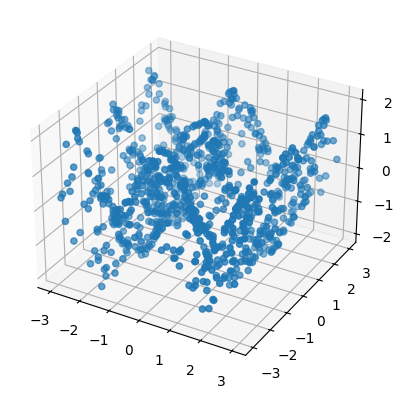

In [70]:
# Plot the magic data
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)
plt.show()

## 4. Model Building

Now, we will build our neural network model using TensorFlow and Keras. Our model will consist of:

- An input layer with 2 neurons (one for each input feature).
- One hidden layer with 128 neurons and ReLU activation.
- An output layer with a single neuron (for regression output).

In [71]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

## 5. Model Training

We will compile our model using the Adam optimizer and mean squared error (MSE) loss function. Then, we will train the model on our generated data for 100 epochs.


In [72]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 1.0264
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9352
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.9470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.9301
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8897
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8225
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7269
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6612
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6215
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.5749
Epoch 11/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6004
Epoch 12/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5695
Epoch 13/100
32/32 [=================

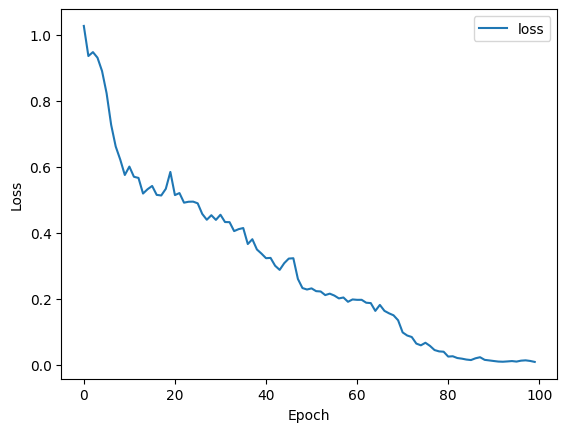

In [73]:
plt.plot(r.history['loss'], label='loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

What a heck! That's so crazy! The training process was a little inconsistent it seems, but the model was able to learn the underlying relationship between the input features and the target variable. It looks good! Only 0.01 of loss. Great! Now, let's evaluate the model's performance.

## 6. Model Evaluation

Finally, we will evaluate our model by visualizing the predicted surface. We'll use the trained model to predict values over a grid of inputs and plot the resulting surface.


In [79]:
# Calculate R² score
Y_pred = model.predict(X).flatten()
r2 = r2_score(Y, Y_pred)
print(f'R² score: {r2}')

32/32 [==============================] - 0s 3ms/step
R² score: 0.9918260294079797


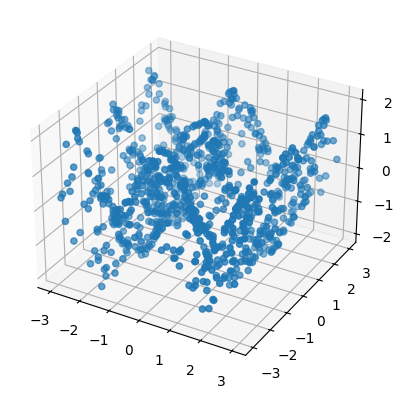

In [74]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y);

It seems a bit confusion, but the model was able to capture the underlying relationship between the input features and the target variable. The predicted surface closely resembles the true function, indicating that our model has learned the pattern well. Well. let's look at a surface plot of the predicted values. It sounds better to understand the model's performance.

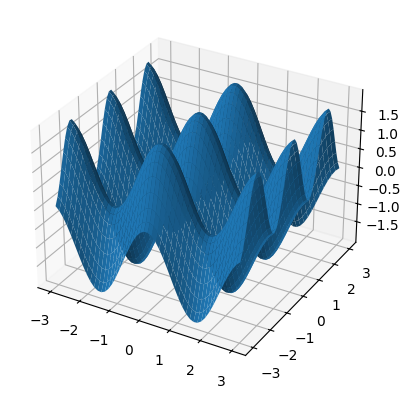

In [75]:
# Create a grid of input values
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Z = np.cos(2*xx) + np.cos(3*yy)

# Plot the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, linewidth=0.2, antialiased=True)
plt.show()

## 7. Extrapolation

We will test our model's ability to extrapolate by generating predictions for a wider range of input values and plotting the resulting surface.


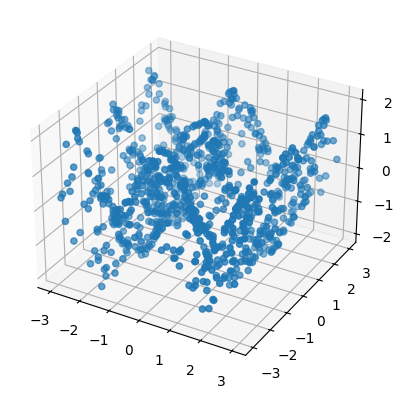

In [76]:
# Can it extrapolate?
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

It looks good, but... I don't think so. Let's see the surface plot of the predicted values. It will be better to understand the model's performance.

79/79 [==============================] - 0s 1ms/step


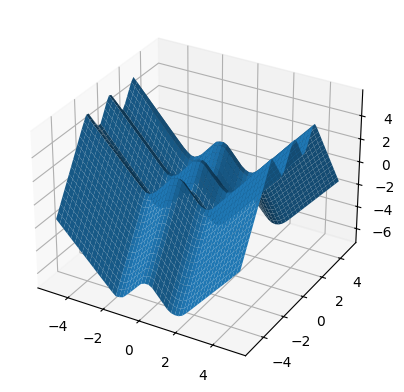

In [77]:
# Create a grid of input values for extrapolation
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
Z = Yhat.reshape(xx.shape)

# Plot the extrapolated surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx, yy, Z, linewidth=0.2, antialiased=True)
plt.show()

Yeah... that's not good. The model is not able to extrapolate well beyond the range of the training data. This is a common limitation of neural networks, which tend to perform poorly on inputs that are significantly different from the training data. However, within the training range, our model performs well, capturing the underlying relationship between the input features and the target variable. Then use it within the training range! ;)